# 模型评估

&emsp;&emsp;做机器学习算法的时候，肯定是需要多个模型进行尝试的，想要在多个模型中进行选择的话，我们就需要多模型进行评估。主要是要评估模型误差的大小。

## 过拟合和欠拟合

过拟合和欠拟合定义:

- **欠拟合**：如果模型不能降低训练误差，这可能意味着我们的模型过于简单（即表达能力不足），无法捕获我们试图学习的模式。此外，由于我们的训练和验证误差之间的泛化误差很小，我们有理由相信可以用一个更复杂的模型降低训练误差。这种现象被称为欠拟合（underfitting）。

- **过拟合**：当我们的训练误差明显低于验证误差时要小心，这表明严重的过拟合（overfitting）。

过拟合分为两种:

1. **参数过拟合**：参数过拟合是指模型训练过程中对参数调节过于细致，导致对训练数据学习过度。
2. **结构过拟合**：指选择的模型过于复杂，以致对训练数据描述过于精细。


设测试数据$\boldsymbol{x}$的真实目标值为$h(\boldsymbol{x})$，观察到的目标值为$t$，模型预测值为$y(\boldsymbol{x})$, 并记$(\boldsymbol{x})$和$t$的联合分布为$p(\boldsymbol{x}, t)$。则模型目标值$t$与预测值$y(\boldsymbol{x})$之间的误差如下：

$$
\begin{aligned}
& \iint(y(x)-t)^{2} p(x, t) \mathrm{d} \boldsymbol{x} \mathrm{d} t \\
=& \iint(y(\boldsymbol{x})-h(\boldsymbol{x})+h(\boldsymbol{x})-t)^{2} p(\boldsymbol{x}, t) \mathrm{d} \boldsymbol{x} \mathrm{d} t\\
=& \int (y(\boldsymbol{x}) - h(\boldsymbol{x}))^{2} p(\boldsymbol{x}) dx + \iint (h(\boldsymbol{x}) - t)^{2} p(\boldsymbol{x}, t) d\boldsymbol{x} dt
\end{aligned} 
$$

其中，假设目标值$t$符合以$h(\boldsymbol{x})$为中心的正态分布，因此交叉项为零。可见，误差函数可分解为预测误差$\int (y(\boldsymbol{x}) - h(\boldsymbol{x}))^{2} p(\boldsymbol{x}) dx$和噪声$\iint (h(\boldsymbol{x}) - t)^{2} p(\boldsymbol{x}, t) d\boldsymbol{x} dt$两部分，前者与模型有关，后者与数据中的噪声有关。

考虑第一部分预测误差，预测函数是通过某一数据集$D$训练出来的，因此将其明确写作$y(x ; D)$, 由于$D$中的数据不同会引起模型差异，考虑这些差异，模型预测的期望值为$\mathbb{E}_{D}[y(x ; D)]$，整理如下：

$$
\begin{aligned}
\{y(x ; D)-h(x)\}^{2}=&\left\{y(x ; D)-\mathbb{E}_{D}[y(x ; D)]+\mathbb{E}_{D}[y(x ; D)]-h(x)\right\}^{2} \\
=&\left\{y(x ; D)-\mathbb{E}_{D}[y(x ; D)]\right\}^{2}+\left\{\mathbb{E}_{D}[y(x ; D)]-h(x)\right\}^{2} \\
&+2\left\{y(x ; D)-\mathbb{E}_{D}[y(x ; D)]\right\}\left\{\mathbb{E}_{D}[y(x ; D)]-h(x)\right\}
\end{aligned}
$$

对$D$求期望，有：

$$
\mathbb{E}_{D}\{y(x ; D)-h(x)\}^{2}=\left\{\mathbb{E}_{D}[y(x ; D)]-h(x)\right\}^{2}+\mathbb{E}_{D}\left\{\left[y(x ; D)-\mathbb{E}_{D}(x ; D)\right]\right\}^{2}
$$

上式右侧第一项是预测的期望$\mathbb{E}_{D}[y(x ; D)]$和真实值$h(x)$之间的差异，第二项是由于数据不同产生的偏差，所以：

$$
TotalError = Bias + Variance + Noise
$$

## 过拟合与欠拟合代码示例

设置真实的函数为:

$$
y = 2 e^{-x} sin(x)
$$

采样数据从真实数据中采样得到，但是会添加一个噪声，噪声服从正态分布$\epsilon \sim N(0, \sigma^{2})$

$$
g(x) = 2 e^{-x} sin(x) + \epsilon \sim N(0, \sigma^{2})
$$

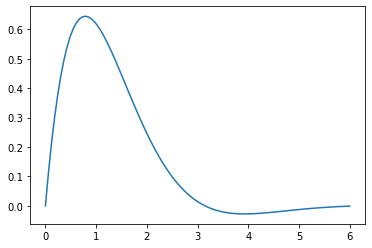

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def TrueFunc(x):
    """定义真实的函数"""
    return 2 * np.exp(-x) * np.sin(x)

X = np.linspace(0, 6, 100)
Y = [TrueFunc(x) for x in X]
plt.plot(X, Y)
plt.show()

In [ ]:
def SampleData():
    np.random.seed(0)  # 设置随机种子
    n_samples = 30
    X = np.sort(0 + np.random.rand(n_samples) * (6-0))  # 均匀采样之后进行缩放, 之后再排序
    Y = TrueFunc(X) + np.random.random(n_samples) * 0.05 # 添加噪声
    return X, y

多项式回归

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly#sklearn.preprocessing.PolynomialFeatures

In [ ]:
def model_train(X, y):
    # 模型训练和测试，采用多项式回归，最高阶次[1, 3, 5, 15]
    degress = [1, 3, 5, 15]
    plt.figure(figsize=(20, 4))
    for i in range(len(degress)):
        plt.subplot(1, len(degress), i + 1)
        PolynomialFeatures = PolynomialFeatures(degress[i], include_bias=False) # 不包含偏置项
        linear_regression = LinearRegression()  # 线形回归模型。
        
plt.show()

## 一种训练集一种算法

### 经验误差与过拟合

- 经验误差：训练集上面的误差-对应训练集数据。

- 泛化误差：在“未来”样本上的误差-对应测试集数据。**验证集是用来调整模型的超参数的**。

&emsp;&emsp;假设有$m$个样本，$Y$表示真实标签，$Y^{\prime}$表示预测结果。其中错了$a$个，那么

1. 错误率(`error rate`)：$E = a / m$。

2. 精度(`accuracy`)：$1 - E$。

3. 误差(`error`)：$|Y - Y^{\prime}|$。

### 模型评估方法

&emsp;&emsp;为什么我们要有训练集、测试集甚至有时候要有验证集？

&emsp;&emsp;因为我们想要的是模型对未知数据的预测能力，所以需要测试集。如果没有测试集的话，网络所学的就是一种记忆能力。

&emsp;&emsp;测试集做出来的方法也有好多种：比如像：1. 留出法；2. 交叉验证法；3. 自助法。

#### 留出法

&emsp;&emsp;留出法就是很简单的三七分、二八分这样。但是要注意训练集与测试集同分布。

&emsp;&emsp;比如有十年的数据，用前七年的数据做训练、后三年的数据做预测的话，就打破了原来数据的分布。这个时候可以采用均匀分别，从十年里面抽取`7`成的数据用来做训练、抽取`3`年的数据用来做测试。

&emsp;&emsp;但是基于金融的这种特殊业务需求的话，用前七年的数据来做后三年的数据在落地层面甚至会更好。


#### 交叉验证法

&emsp;&emsp;比如说十折交叉验证，我们就将其分为十份$D_{1} \cdots D_{10}$。

&emsp;&emsp;第一次的时候用第十个$D_{10}$当作测试集、第二次的时候用第九个$D_{9}$当作测试集，第十次的时候用第一个$D_{1}$当作测试集。每一次都有一个测试结果，十次就是是个测试结果，最后将测试结果取平均就能得到最终的结果，作为这个模型的衡量标准。

&emsp;&emsp;缺点在于数据量比较大的时候，对算力要求比较高，因为要学习多个模型。

#### 自助法

&emsp;&emsp;假设我们有$m$个样本，那么对于其中的任意一个样本来说，它被选中的概率是$\frac{1}{m}$，没有被选中的概率是$1 - \frac{1}{m}$,样本在$m$次采样始终不被采到的概率是$(1-\frac{1}{m})^{m}$, 取极限可以得到为:

$$
lim_{m->\infty}(1 - \frac{1}{m})^{m} -> \frac{1}{e} = 0.368
$$

&emsp;&emsp;通过自助采样的方式，数据集中将会有$36.8\%$的样本采样不到, 可以作为验证集。

&emsp;&emsp;这样的方式也会改变了数据集原有的分布，比如之前的样本每个都是一个，采样完之后就有些多，有些少，甚至有些没有出现的作为测试集。

### 验证集

&emsp;&emsp;`validation set`是针对参数很难调的场合，需要调整的神经网络层数、神经网络的节点个数、学习率等等有很多的需要去调整的地方。这样就容易使得调出来的模型在测试集上过拟合。

&emsp;&emsp;因此有了在训练集上训练、在验证集上看结果，调参，再看验证集结果参数调完之后，最终到测试集上看结果。

### 性能度量

&emsp;&emsp;`performance management`性能度量。

#### 均方差

&emsp;&emsp;回归任务最常用的性能度量是“均方误差”（mean squared error）。

$$
E(f ; D)=\frac{1}{m} \sum_{i=1}^{m}\left(f\left(\boldsymbol{x}_{i}\right)-y_{i}\right)^{2}
$$

#### 错误率(error rate)

$$
E(f ; D)=\frac{1}{m} \sum_{i=1}^{m} \mathbb{I}\left(f\left(\boldsymbol{x}_{i}\right) \neq y_{i}\right)
$$

&emsp;&emsp;其中$\mathbb{I}$表示示性函数，当其中$f\left(\boldsymbol{x}_{i}\right) \neq y_{i}$的时候取`1`，相等的时候取`0`值。

#### 精度(accuracy)

$$
\begin{aligned}
\operatorname{acc}(f ; D) &=\frac{1}{m} \sum_{i=1}^{m} \mathbb{I}\left(f\left(\boldsymbol{x}_{i}\right)=y_{i}\right) \\
&=1-E(f ; D)
\end{aligned}
$$

#### 查准率与查全率

- **混淆矩阵**

&emsp;&emsp;在二分类数据集中，标签有两种，正例和负例。模型分类之后，也有两种：预测正例和预测负例。两种分类方法交叉之后，就产生了**四种数据集合**。

<img src="../images/confusion_matrix.jpeg" width="40%">


- `Precision`**查准率**: 表示从所有预测为正例中的结果中，预测正确的概率。

$$
P = \frac{TP}{TP+FP}
$$

- `Recall`**查全率**: 表示从所有真实为正例的样本中，预测正确的概率。

$$
P = \frac{TP}{TP+FN}
$$

&emsp;&emsp;**为什么我们需要查准率和查全率呢**？

&emsp;&emsp;假设有一个手写体数字识别的数据集，但是我们只需要识别数字是否为`5`，那么标签就是两类，是或者不是。如果全部输出为不是数字`5`，我们也有百分之九十的准确率。

&emsp;&emsp;**P-R曲线**:

&emsp;&emsp;随着判定阈值的移动，`Precision`和`Recall`必定是一个反向的关系。阈值越严苛，查准率越高，查全率越低。阈值越松弛，查准率越低，查全率越高。

&emsp;&emsp;**所以如果当召回率为百分之百的时候，如果精准率依然很高的话，说明模型就已经很好了。**

&emsp;&emsp;**那P-R曲线的这个阈值如何确定呢？**

1. **方法一**：使用平衡点(Break-Even Point, BEP) R = P时R与P的值。

2. **方法二**：F1度量，$F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$，$\frac{1}{F 1}=\frac{1}{2} \cdot\left(\frac{1}{P}+\frac{1}{R}\right)$。

3. **方法三**：$F_{\beta}$则是加权调和平均，$\frac{1}{F_{\beta}}=\frac{1}{1+\beta^{2}} \cdot\left(\frac{1}{P}+\frac{\beta^{2}}{R}\right)$，$\beta > 1$时，查全率有更大的影响，$\beta < 1$时，查准率有更大的影响。（可以手推一下）。

&emsp;&emsp;如果是多分类的话，可以转为二分类的计算，得到多个P和多个R，然后可以对其进行取平均计算等等。

## 一种训练集多种算法

&emsp;&emsp;上面的工作都是说的一个训练集上的一种算法，然后在这种算法用什么样的指标来衡量其好坏。

&emsp;&emsp;不同的算法之间做比较的话，他们又是如何来做的呢？

&emsp;&emsp;可以画出`P-R`曲线来进行表示。在查准率相同的情况下，肯定选择查准率较高的值比较好。

### ROC曲线与AUC面积

- `TPR`(True Positive Rate): 真正率 $TPR = \frac{TP}{TP + FN}$。

- `FPR`(False Positive Rate): 假正率 $FPR = \frac{FP}{TN + FP}$。

&emsp;&emsp;随着阈值的改变，他们两呈现的是一个同向的变化。阈值松一点的话，上述的两个值都会增大，阈值严苛一点的话，上述的两个值都会减小。

&emsp;&emsp;那么在假正率固定的情况下，我们期望真正率越大越好。横坐标为假正率、纵坐标为真正率所围成的面积就是`AUC`的面积。

- rank loss

$$
\ell_{\text {rank }}=\frac{1}{m^{+} m^{-}} \sum_{\boldsymbol{x}^{+} \in D^{+}} \sum_{\boldsymbol{x}^{-} \in D^{-}}\left(\mathbb{I}\left(f\left(\boldsymbol{x}^{+}\right)<f\left(\boldsymbol{x}^{-}\right)\right)+\frac{1}{2} \mathbb{I}\left(f\left(\boldsymbol{x}^{+}\right)=f\left(\boldsymbol{x}^{-}\right)\right)\right)
$$

&emsp;&emsp;`AUC`和`rank loss`的关系是：$AUC = 1 - rank loss$。

### 代价敏感曲线

&emsp;&emsp;在分类的时候，所犯错误导致的后果不同，使得给它的分数也不同。

- **代价敏感的错误率**为:

$$
\begin{aligned}
E(f ; D ; \operatorname{cost})=& \frac{1}{m}\left(\sum_{\boldsymbol{x}_{i} \in D^{+}} \mathbb{I}\left(f\left(\boldsymbol{x}_{i}\right) \neq y_{i}\right) \times \operatorname{cost}_{01}\right.\\
&\left.+\sum_{\boldsymbol{x}_{i} \in D^{-}} \mathbb{I}\left(f\left(\boldsymbol{x}_{i}\right) \neq y_{i}\right) \times \cos t_{10}\right)
\end{aligned}
$$

- **代价曲线**





## 多种训练集多种算法

## 测试集上的性能能多大程度上保证真实的性能

## 为什么要进行模型评估




依据混淆矩阵我们可以得到不同的评价指标：


- Accuracy

$$
(TP+TN)/Total
$$

- F1=2*Recall*Precision/(Recall + Precison)

- AUC动态混淆矩阵计算得到

$$
Y轴：真正例率 TPR = TP/(TP + FN)
$$

$$
X轴：假正例率 FPR = FP/(TN + FP)
$$

## 什么是模型评估

模型评估主要包括**评估方法**、**性能度量**、**比较检验**。这三者是环环相扣，层层深入。评估方法说的是如何对数据集进行划分，划分出来之后进行一个指标上的度量，指标度量完之后进行指标的比较。

### 性能度量

- 均方误差 ROC AUC：这三个在现实中用的比较多。

- 错误率vs精度 差准率vs查全率F1：这个应用也比较广泛。

### 比较检验(判断实质差异)

从理论上验证某一个指标的科学性，

## 深入理解模型评估

- 偏差vs方差

偏差时期望值和实际值的差值。方差是模型预测值的方差。

实际的误差由偏差、方差和不可预测值三部分组成

$$
Err(x)=Bias^{2} + Variance + Irreducible Error
$$

- 过拟合vs欠拟合

模型越复杂，模型拟合能力越强，偏差逐渐变小，容易过拟合。模型越复杂，可能性就会越多，方差越大。

# 分类问题性能评估


- `F1 score`：
 
 
为什么需要这些指标：
- 数据不平衡，如 98% 邮件都是垃圾邮件，模型检测是否垃圾邮件？将所有邮件都归为垃圾邮件，此时精度仍有 98%
- 例如针对儿童的视频分类器，该分类器可能误屏蔽很多好视频(`low recall`)，但是坏视频的准确率必须要很高(`high precision`)
     
`Precision/Recall Tradeoff`，如下图所示：十个数字，预测为 5 的概率从左至右依次增大，当判断是否为 5 的阈值改变时，对应的 `precision/recall` 相应会发生变化，`precision` 越大，`recall` 越小，反之也成立

![](../../images/DecisionThreshold_PrecisionRecallTradeoff.png)

 
 
 
`ROC` 曲线，纵轴是真正例率(`True Positive Rate`)，横轴是假正例率(`False Positive Rate`)

In [ ]:
# TP、TN、FP、FN
def getTP(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 1))


def getTN(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 0))


def getFP(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 1))


def getFN(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 0))

In [ ]:
# confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = getTP(y_true, y_pred)
    TN = getTN(y_true, y_pred)
    FP = getFP(y_true, y_pred)
    FN = getFN(y_true, y_pred)
    return np.array([[TN, FP], [FN, TP]])

In [ ]:
# 精度
def accuracy(y_true, y_pred):
    return sum(y_true == y_pred) / len(y_true)

In [ ]:
# 查全率：所有正样本中，正确预测的比率
def recall(y_true, y_pred):
    TP = getTp(y_true, y_pred)
    FN = getFN(y_true, y_pred)
    return TP / (TP + FN)

In [ ]:
# 查准率：预测为正的所有样本中，正样本的比率
def precision(y_true, y_pred):
    TP = getTP(y_true, y_pred)
    FP = getFP(y_true, y_pred)
    return TP / (TP + FP)

In [ ]:
# f1 score：是查全率与查准率的调和平均值，其值越大越好
def f1_score(y_true, y_pred):
    r = recall(y_true, y_pred)
    p = precision(y_true, y_pred)
    return 2 * r * p / (r + p)

In [ ]:
# sklearn API
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, accuracy_score

y = [0] * 5 + [1] * 5
y_pred = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

print("精度为   :", accuracy_score(y, y_pred))
print("查准率   :", precision_score(y, y_pred))
print("查全率   :", recall_score(y, y_pred))
print("F1 score:", f1_score(y, y_pred))

In [ ]:
# ROC 曲线
# 得到预测概率后，设定阈值，得到预测标签；
# 改变阈值，性能指标值就会发生变化
# 当没有设定阈值时，如何评估模型?
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = np.array([1, 1, 2, 2])
y_score = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=2)
# 返回每个阈值对应的真阳性率、假阳性率及阈值列表


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr, tpr)
plt.show()